## Objectives

1. Better understand / predict how much revenue to expect from each customer within their first year of orders. 

2. Better promote / predict the "Halfway there" product to a wider audience.

In [2]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output

import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Loading and Exploration

In [3]:
dataset_path = 'Apprentice_Chef_Dataset.xlsx'
datadict_path = 'Apprentice_Chef_Data_Dictionary.xlsx'

In [4]:
df_dataset = pd.read_excel(dataset_path)
df_datadict = pd.read_excel(datadict_path)

Print data for exploration

In [5]:
df_dataset

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0


In [6]:
df_datadict

,Column,Data Type,Description
0,REVENUE,Float,Total revenue generated from the customer
1,CROSS_SELL_SUCCESS,Integer,Success of promoting Halfway There
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name
5,FAMILY_NAME,string,Last name
6,TOTAL_MEALS_ORDERED,Integer,The total amount of meals orderd by the custom...
7,UNIQUE_MEALS_PURCH,Integer,Number of uniqe meal sets ordered by the customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times customer was in contact with c...
9,PRODUCT_CATEGORIES_VIEWED,Integer,Total number of meal categories viewed


## Feature Engineering

- Let's turn emails into a categorical variable where the choices are the following:

0: professional, 

1: personal, 

2: junk,

3: uncategorized

In [7]:
def classify_domain_group(email):
    domain_name = email.split('@')[1]
    personal_email_domains = ['gmail.com', 'yahoo.com', 'protonmail.com']
    professional_email_domains  = ['mmm.com', 
                              'amex.com',
                              'apple.com',
                              'boeing.com',
                              'caterpillar.com',
                              'chevron.com',
                              'cisco.com',
                              'cocacola.com',
                              'disney.com',
                              'dupont.com',
                              'exxon.com',
                              'ge.org',
                              'goldmansacs.com',
                              'homedepot.com',
                              'ibm.com',
                              'intel.com',
                              'jnj.com',
                              'jpmorgan.com',
                              'mcdonalds.com',
                              'merck.com',
                              'microsoft.com',
                              'nike.com',
                              'pfizer.com',
                              'pg.com',
                              'travelers.com',
                              'unitedtech.com',
                              'unitedhealth.com',
                              'verizon.com',
                              'visa.com',
                              'walmart.com']

    junk_email_domains = ['me.com', 'aol.com', 'hotmail.com', 'live.com','msn.com', 'passport.com']
    
    if domain_name in professional_email_domains:
        return 'Professional'
    elif domain_name in personal_email_domains:
        return 'Personal'
    elif domain_name in junk_email_domains:
        return 'Junk'
    else:
        return 'Unclassified'
    
    
df_dataset['DOMAIN_GROUP'] = df_dataset['EMAIL'].apply(lambda email: classify_domain_group(email))

- Outlier Values from looking at the graphs

In [8]:
TOTAL_MEALS_ORDERED_HI = 500
UNIQUE_MEALS_PURCH_HI = 20
CONTACTS_W_CUSTOMER_SERVICE_HI = 18
PRODUCT_CATEGORIES_VIEWED_HI = 10
AVG_TIME_PER_SITE_VISIT_HI = 1500
CANCELLATIONS_BEFORE_NOON_HI = 12
CANCELLATIONS_AFTER_NOON_HI = 3
TASTES_AND_PREFERENCES_HI = 1.5
TASTES_AND_PREFERENCES_LO = -0.2
MOBILE_LOGINS_HI = 7
MOBILE_LOGINS_LO = 4
PC_LOGINS_HI = 3
WEEKLY_PLAN_HI = 60
EARLY_DELIVERIES_HI = 11
LATE_DELIVERIES_HI = 18
PACKAGE_LOCKER_HI = 1
FOLLOWED_RECOMMENDATIONS_PCT_HI=90 
AVG_PREP_VID_TIME_HI = 450
LARGEST_ORDER_SIZE_HI = 11
MASTER_CLASSES_ATTENDED_HI = 3
MEDIAN_MEAL_RATING_HI = 5
AVG_CLICKS_PER_VISIT_HI=19
TOTAL_PHOTOS_VIEWED_HI= 1200
REVENUE_HI = 10000

- Making Outlier into a feature

In [9]:
original_df = df_dataset
# TOTAL_MEALS_ORDERED
original_df['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#UNIQUE_MEALS_PURCH
original_df['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

original_df['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
original_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]

original_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
original_df['OUT_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'OUT_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]

original_df['OUT_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_SITE_VISIT
original_df['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

original_df['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON
original_df['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

original_df['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON
original_df['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] >  CANCELLATIONS_AFTER_NOON_HI]

original_df['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TASTES_AND_PREFERENCES
original_df['OUT_TASTES_AND_PREFERENCES'] = 0
condition_hi = original_df.loc[0:,'OUT_TASTES_AND_PREFERENCES'][original_df['TOTAL_MEALS_ORDERED'] > TASTES_AND_PREFERENCES_HI]
condition_hi = original_df.loc[0:,'OUT_TASTES_AND_PREFERENCES'][original_df['TOTAL_MEALS_ORDERED'] < TASTES_AND_PREFERENCES_LO ]
original_df['OUT_TASTES_AND_PREFERENCES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# MOBILE_LOGINS 
original_df['OUT_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'OUT_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_hi = original_df.loc[0:,'OUT_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PC_LOGINS
original_df['OUT_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'OUT_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_HI]

original_df['OUT_PC_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# WEEKLY_PLAN
original_df['OUT_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'OUT_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# EARLY_DELIVERIES
original_df['OUT_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'OUT_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES_ORDERED
original_df['OUT_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'OUT_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PACKAGE_LOCKER
original_df['OUT_PACKAGE_LOCKER'] = 0
condition_hi = original_df.loc[0:,'OUT_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] > PACKAGE_LOCKER_HI]

original_df['OUT_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT
original_df['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

original_df['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
original_df['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

original_df['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE
original_df['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

original_df['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

 # MASTER_CLASSES_ATTENDED
original_df['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# MEDIAN_MEAL_RATING
original_df['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'OUT_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_CLICKS_PER_VISIT
original_df['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]

original_df['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TOTAL_PHOTOS_VIEWED
original_df['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

original_df['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# REVENUE
original_df['OUT_REVENUE'] = 0
condition_hi = original_df.loc[0:,'OUT_REVENUE'][original_df['REVENUE'] > REVENUE_HI]

original_df['OUT_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


Finally, let's choose which feature sets to work with.

In [10]:
drop_columns = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN_GROUP']
original_df.drop(drop_columns, axis=1, inplace=True)

In [11]:
original_df

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,OUT_TOTAL_MEALS_ORDERED,OUT_UNIQUE_MEALS_PURCH,OUT_CONTACTS_W_CUSTOMER_SERVICE,OUT_PRODUCT_CATEGORIES_VIEWED,OUT_AVG_TIME_PER_SITE_VISIT,OUT_CANCELLATIONS_BEFORE_NOON,OUT_CANCELLATIONS_AFTER_NOON,OUT_TASTES_AND_PREFERENCES,OUT_MOBILE_LOGINS,OUT_PC_LOGINS,OUT_WEEKLY_PLAN,OUT_EARLY_DELIVERIES,OUT_LATE_DELIVERIES,OUT_PACKAGE_LOCKER,OUT_FOLLOWED_RECOMMENDATIONS_PCT,OUT_AVG_PREP_VID_TIME,OUT_LARGEST_ORDER_SIZE,OUT_MASTER_CLASSES_ATTENDED,OUT_MEDIAN_MEAL_RATING,OUT_AVG_CLICKS_PER_VISIT,OUT_TOTAL_PHOTOS_VIEWED,OUT_REVENUE
0,1880.0,1,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1495.0,1,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2572.5,1,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1647.0,1,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1923.0,1,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1942,1432.0,0,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1943,623.0,0,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1944,899.0,0,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Let's use ols to pick some columns that are highly irrelevant with p values.

In [12]:
column_names = original_df.columns
drop_cols = ['REVENUE', 'CROSS_SELL_SUCCESS']
df_revenue = original_df.loc[:, 'REVENUE']
df_halfway = original_df.loc[:, 'CROSS_SELL_SUCCESS']
df_customer_data = original_df.drop(drop_cols, axis=1)

X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(df_customer_data, df_revenue, test_size = 0.25,
                                                        random_state = 219)

- create formula for ols

In [13]:
for val in column_names:
    if val not in drop_cols:
        print(f"Rev_train['{val}'] +")

Rev_train['TOTAL_MEALS_ORDERED'] +
Rev_train['UNIQUE_MEALS_PURCH'] +
Rev_train['CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train['PRODUCT_CATEGORIES_VIEWED'] +
Rev_train['AVG_TIME_PER_SITE_VISIT'] +
Rev_train['MOBILE_NUMBER'] +
Rev_train['CANCELLATIONS_BEFORE_NOON'] +
Rev_train['CANCELLATIONS_AFTER_NOON'] +
Rev_train['TASTES_AND_PREFERENCES'] +
Rev_train['MOBILE_LOGINS'] +
Rev_train['PC_LOGINS'] +
Rev_train['WEEKLY_PLAN'] +
Rev_train['EARLY_DELIVERIES'] +
Rev_train['LATE_DELIVERIES'] +
Rev_train['PACKAGE_LOCKER'] +
Rev_train['REFRIGERATED_LOCKER'] +
Rev_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train['AVG_PREP_VID_TIME'] +
Rev_train['LARGEST_ORDER_SIZE'] +
Rev_train['MASTER_CLASSES_ATTENDED'] +
Rev_train['MEDIAN_MEAL_RATING'] +
Rev_train['AVG_CLICKS_PER_VISIT'] +
Rev_train['TOTAL_PHOTOS_VIEWED'] +
Rev_train['OUT_TOTAL_MEALS_ORDERED'] +
Rev_train['OUT_UNIQUE_MEALS_PURCH'] +
Rev_train['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train['OUT_PRODUCT_CATEGORIES_VIEWED'] +
Rev_train['OUT_AVG_TIME_PER

In [14]:
Rev_train = pd.concat([X_train_rev, y_train_rev], axis = 1)
# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ Rev_train['TOTAL_MEALS_ORDERED'] +
Rev_train['UNIQUE_MEALS_PURCH'] +
Rev_train['CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train['PRODUCT_CATEGORIES_VIEWED'] +
Rev_train['AVG_TIME_PER_SITE_VISIT'] +
Rev_train['MOBILE_NUMBER'] +
Rev_train['CANCELLATIONS_BEFORE_NOON'] +
Rev_train['CANCELLATIONS_AFTER_NOON'] +
Rev_train['TASTES_AND_PREFERENCES'] +
Rev_train['MOBILE_LOGINS'] +
Rev_train['PC_LOGINS'] +
Rev_train['WEEKLY_PLAN'] +
Rev_train['EARLY_DELIVERIES'] +
Rev_train['LATE_DELIVERIES'] +
Rev_train['PACKAGE_LOCKER'] +
Rev_train['REFRIGERATED_LOCKER'] +
Rev_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train['AVG_PREP_VID_TIME'] +
Rev_train['LARGEST_ORDER_SIZE'] +
Rev_train['MASTER_CLASSES_ATTENDED'] +
Rev_train['MEDIAN_MEAL_RATING'] +
Rev_train['AVG_CLICKS_PER_VISIT'] +
Rev_train['TOTAL_PHOTOS_VIEWED'] +
Rev_train['OUT_TOTAL_MEALS_ORDERED'] +
Rev_train['OUT_UNIQUE_MEALS_PURCH'] +
Rev_train['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train['OUT_PRODUCT_CATEGORIES_VIEWED'] +
Rev_train['OUT_AVG_TIME_PER_SITE_VISIT'] +
Rev_train['OUT_CANCELLATIONS_BEFORE_NOON'] +
Rev_train['OUT_CANCELLATIONS_AFTER_NOON'] +
Rev_train['OUT_TASTES_AND_PREFERENCES'] +
Rev_train['OUT_MOBILE_LOGINS'] +
Rev_train['OUT_PC_LOGINS'] +
Rev_train['OUT_WEEKLY_PLAN'] +
Rev_train['OUT_EARLY_DELIVERIES'] +
Rev_train['OUT_LATE_DELIVERIES'] +
Rev_train['OUT_PACKAGE_LOCKER'] +
Rev_train['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train['OUT_AVG_PREP_VID_TIME'] +
Rev_train['OUT_LARGEST_ORDER_SIZE'] +
Rev_train['OUT_MASTER_CLASSES_ATTENDED'] +
Rev_train['OUT_MEDIAN_MEAL_RATING'] +
Rev_train['OUT_AVG_CLICKS_PER_VISIT'] +
Rev_train['OUT_TOTAL_PHOTOS_VIEWED'] +
Rev_train['OUT_REVENUE']
                                """,
                                data = Rev_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     99.07
Date:                Tue, 04 Feb 2020   Prob (F-statistic):          4.42e-304
Time:                        12:10:28   Log-Likelihood:                -11578.
No. Observations:                1459   AIC:                         2.321e+04
Df Residuals:                    1431   BIC:                         2.336e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/Users/lilinhong/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/lilinhong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/lilinhong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/lilinhong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


- Discarding any columns with p value higher than 0.6

In [15]:
drop_cols_pval = [
                'MOBILE_NUMBER',
                'TASTES_AND_PREFERENCES',
                'WEEKLY_PLAN',
                'EARLY_DELIVERIES',
                'REFRIGERATED_LOCKER',
                'PACKAGE_LOCKER',
                'AVG_CLICKS_PER_VISIT',
                'OUT_CONTACTS_W_CUSTOMER_SERVICE',
                'OUT_PRODUCT_CATEGORIES_VIEWED',
                'OUT_CANCELLATIONS_BEFORE_NOON',
                'OUT_LATE_DELIVERIES',
                ]
Rev_train_refined = Rev_train.drop(drop_cols_pval, axis=1)

- Repeat Ols

In [16]:
for val in column_names:
    if val not in drop_cols+drop_cols_pval:
        print(f"Rev_train_refined['{val}'] +")

Rev_train_refined['TOTAL_MEALS_ORDERED'] +
Rev_train_refined['UNIQUE_MEALS_PURCH'] +
Rev_train_refined['CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train_refined['PRODUCT_CATEGORIES_VIEWED'] +
Rev_train_refined['AVG_TIME_PER_SITE_VISIT'] +
Rev_train_refined['CANCELLATIONS_BEFORE_NOON'] +
Rev_train_refined['CANCELLATIONS_AFTER_NOON'] +
Rev_train_refined['MOBILE_LOGINS'] +
Rev_train_refined['PC_LOGINS'] +
Rev_train_refined['LATE_DELIVERIES'] +
Rev_train_refined['FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train_refined['AVG_PREP_VID_TIME'] +
Rev_train_refined['LARGEST_ORDER_SIZE'] +
Rev_train_refined['MASTER_CLASSES_ATTENDED'] +
Rev_train_refined['MEDIAN_MEAL_RATING'] +
Rev_train_refined['TOTAL_PHOTOS_VIEWED'] +
Rev_train_refined['OUT_TOTAL_MEALS_ORDERED'] +
Rev_train_refined['OUT_UNIQUE_MEALS_PURCH'] +
Rev_train_refined['OUT_AVG_TIME_PER_SITE_VISIT'] +
Rev_train_refined['OUT_CANCELLATIONS_AFTER_NOON'] +
Rev_train_refined['OUT_TASTES_AND_PREFERENCES'] +
Rev_train_refined['OUT_MOBILE_LOGINS'] +
Rev_trai

In [17]:
# Step 1: build a model
lm_best = smf.ols(formula =  """
                                REVENUE ~ Rev_train_refined['TOTAL_MEALS_ORDERED'] +
Rev_train_refined['UNIQUE_MEALS_PURCH'] +
Rev_train_refined['CONTACTS_W_CUSTOMER_SERVICE'] +
Rev_train_refined['PRODUCT_CATEGORIES_VIEWED'] +
Rev_train_refined['AVG_TIME_PER_SITE_VISIT'] +
Rev_train_refined['CANCELLATIONS_BEFORE_NOON'] +
Rev_train_refined['CANCELLATIONS_AFTER_NOON'] +
Rev_train_refined['MOBILE_LOGINS'] +
Rev_train_refined['PC_LOGINS'] +
Rev_train_refined['LATE_DELIVERIES'] +
Rev_train_refined['FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train_refined['AVG_PREP_VID_TIME'] +
Rev_train_refined['LARGEST_ORDER_SIZE'] +
Rev_train_refined['MASTER_CLASSES_ATTENDED'] +
Rev_train_refined['MEDIAN_MEAL_RATING'] +
Rev_train_refined['TOTAL_PHOTOS_VIEWED'] +
Rev_train_refined['OUT_TOTAL_MEALS_ORDERED'] +
Rev_train_refined['OUT_UNIQUE_MEALS_PURCH'] +
Rev_train_refined['OUT_AVG_TIME_PER_SITE_VISIT'] +
Rev_train_refined['OUT_CANCELLATIONS_AFTER_NOON'] +
Rev_train_refined['OUT_TASTES_AND_PREFERENCES'] +
Rev_train_refined['OUT_MOBILE_LOGINS'] +
Rev_train_refined['OUT_PC_LOGINS'] +
Rev_train_refined['OUT_WEEKLY_PLAN'] +
Rev_train_refined['OUT_EARLY_DELIVERIES'] +
Rev_train_refined['OUT_PACKAGE_LOCKER'] +
Rev_train_refined['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] +
Rev_train_refined['OUT_AVG_PREP_VID_TIME'] +
Rev_train_refined['OUT_LARGEST_ORDER_SIZE'] +
Rev_train_refined['OUT_MASTER_CLASSES_ATTENDED'] +
Rev_train_refined['OUT_MEDIAN_MEAL_RATING'] +
Rev_train_refined['OUT_AVG_CLICKS_PER_VISIT'] +
Rev_train_refined['OUT_TOTAL_PHOTOS_VIEWED'] +
Rev_train_refined['OUT_REVENUE']
                                """,
                                data = Rev_train_refined)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 04 Feb 2020   Prob (F-statistic):          2.91e-313
Time:                        12:10:46   Log-Likelihood:                -11579.
No. Observations:                1459   AIC:                         2.320e+04
Df Residuals:                    1440   BIC:                         2.330e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## Model Exploration

#### 1. Simple Correlation Analysis

Let's check to see whether there is a column that is directly correlated to both the revenue and the "Halfway there" product purchase.

In [18]:
# creating a (Pearson) correlation matrix
df_corr = df_dataset.corr().round(2)
# printing (Pearson) correlations with Revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                             1.00
AVG_PREP_VID_TIME                   0.64
MEDIAN_MEAL_RATING                  0.61
TOTAL_MEALS_ORDERED                 0.60
TOTAL_PHOTOS_VIEWED                 0.47
MASTER_CLASSES_ATTENDED             0.45
LARGEST_ORDER_SIZE                  0.44
AVG_TIME_PER_SITE_VISIT             0.14
CONTACTS_W_CUSTOMER_SERVICE         0.10
MOBILE_NUMBER                       0.03
PRODUCT_CATEGORIES_VIEWED           0.03
OUT_TOTAL_PHOTOS_VIEWED             0.03
MOBILE_LOGINS                       0.02
CANCELLATIONS_BEFORE_NOON           0.01
OUT_AVG_TIME_PER_SITE_VISIT         0.01
OUT_LATE_DELIVERIES                 0.01
WEEKLY_PLAN                         0.01
TASTES_AND_PREFERENCES              0.01
CROSS_SELL_SUCCESS                  0.00
OUT_CANCELLATIONS_BEFORE_NOON      -0.00
REFRIGERATED_LOCKER                -0.00
EARLY_DELIVERIES                   -0.00
PACKAGE_LOCKER                     -0.01
OUT_AVG_PREP_VID_TIME              -0.01
LATE_DELIVERIES 

In [19]:
# creating a (Pearson) correlation matrix
df_corr = df_dataset.corr().round(2)
# printing (Pearson) correlations with Revenue
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                  1.00
FOLLOWED_RECOMMENDATIONS_PCT        0.46
CANCELLATIONS_BEFORE_NOON           0.16
MOBILE_NUMBER                       0.10
TASTES_AND_PREFERENCES              0.08
REFRIGERATED_LOCKER                 0.07
PACKAGE_LOCKER                      0.04
MOBILE_LOGINS                       0.04
MASTER_CLASSES_ATTENDED             0.04
CONTACTS_W_CUSTOMER_SERVICE         0.04
MEDIAN_MEAL_RATING                  0.03
AVG_PREP_VID_TIME                   0.03
OUT_CANCELLATIONS_BEFORE_NOON       0.02
OUT_AVG_TIME_PER_SITE_VISIT         0.02
LARGEST_ORDER_SIZE                  0.02
EARLY_DELIVERIES                    0.02
LATE_DELIVERIES                     0.01
TOTAL_MEALS_ORDERED                 0.01
TOTAL_PHOTOS_VIEWED                 0.01
AVG_TIME_PER_SITE_VISIT             0.01
UNIQUE_MEALS_PURCH                  0.00
PRODUCT_CATEGORIES_VIEWED           0.00
REVENUE                             0.00
WEEKLY_PLAN                        -0.01
OUT_TOTAL_PHOTOS

In [23]:
print(df_datadict[df_datadict['Column']=='AVG_PREP_VID_TIME']['Description'])

23    Average time in seconeds meal prep instruction...
Name: Description, dtype: object


The top correlation categories show some obvious insights:

1) Revenue:

AVG_PREP_VID_TIME               0.64 - Whoever watches the instruction videos longer provide higher revenue

MEDIAN_MEAL_RATING              0.61 - Whoever likes the meals more 

TOTAL_MEALS_ORDERED             0.60 - Whoever orders more (reason why it's less than 1 is because of the cancellations?

TOTAL_PHOTOS_VIEWED             0.47 - Whoever views more photos

MASTER_CLASSES_ATTENDED         0.45 - Whoever attends cooking master class

LARGEST_ORDER_SIZE              0.44 - Whoever orders in larger bulk

AVG_CLICKS_PER_VISIT           -0.55 - Whoever clicked less

#### 3. Standardized Linear Regression with Sklearn

In [44]:
column_names = original_df.columns
drop_cols = ['REVENUE', 'CROSS_SELL_SUCCESS']
df_revenue = original_df.loc[:, 'REVENUE']
df_halfway = original_df.loc[:, 'CROSS_SELL_SUCCESS']
df_customer_data = original_df.drop(drop_cols+drop_cols_pval, axis=1)

X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(df_customer_data, df_revenue, test_size = 0.25,
                                                        random_state = 212)

In [45]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(X_train_rev)


# TRANSFORMING our data after fit
X_scaled_train = scaler.transform(X_train_rev)
X_scaled_test = scaler.transform(X_test_rev)

# converting scaled data into a DataFrame
X_scaled_train_rev = pd.DataFrame(X_scaled_train, columns=X_train_rev.columns)
X_scaled_test_rev = pd.DataFrame(X_scaled_test,columns=X_train_rev.columns)


# checking the results
X_scaled_train_rev.describe().round(2)

,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,MOBILE_LOGINS,PC_LOGINS,LATE_DELIVERIES,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,TOTAL_PHOTOS_VIEWED,OUT_TOTAL_MEALS_ORDERED,OUT_UNIQUE_MEALS_PURCH,OUT_AVG_TIME_PER_SITE_VISIT,OUT_CANCELLATIONS_AFTER_NOON,OUT_TASTES_AND_PREFERENCES,OUT_MOBILE_LOGINS,OUT_PC_LOGINS,OUT_WEEKLY_PLAN,OUT_EARLY_DELIVERIES,OUT_PACKAGE_LOCKER,OUT_FOLLOWED_RECOMMENDATIONS_PCT,OUT_AVG_PREP_VID_TIME,OUT_LARGEST_ORDER_SIZE,OUT_MASTER_CLASSES_ATTENDED,OUT_MEDIAN_MEAL_RATING,OUT_AVG_CLICKS_PER_VISIT,OUT_TOTAL_PHOTOS_VIEWED,OUT_REVENUE
count,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.0,1459.0,1459.00,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.00,1459.0,1459.0,1459.0,1459.0,1459.00,1459.0
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.0,0.0,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00,0.0,0.0,0.0,0.0,-0.00,0.0
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00,0.0
min,-1.17,-1.55,-2.64,-1.44,-1.38,-0.91,-0.38,-2.62,-2.80,-1.08,-1.34,-2.18,-2.25,-0.95,-2.39,-0.59,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,-0.04,0.0
25%,-0.64,-0.75,-0.85,-0.78,-0.42,-0.91,-0.38,-0.89,-0.90,-0.72,-0.96,-0.72,-0.95,-0.95,-1.06,-0.59,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,-0.04,0.0
50%,-0.26,0.06,0.05,-0.12,-0.10,-0.26,-0.38,0.84,-0.90,-0.36,-0.22,-0.09,-0.30,0.60,0.27,-0.59,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,-0.04,0.0
75%,0.37,0.86,0.50,0.87,0.27,0.39,-0.38,0.84,0.99,0.36,0.89,0.44,0.34,0.60,0.27,0.38,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.03,0.0,0.0,0.0,0.0,-0.04,0.0
max,7.58,5.68,4.98,1.53,23.52,7.52,4.43,2.57,2.88,5.77,2.00,8.36,4.23,3.69,2.93,8.33,0.0,0.0,38.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.18,0.0,0.0,0.0,0.0,26.99,0.0


In [26]:
# INSTANTIATING a model object
lr = LinearRegression() #sklearn.linear_model.Linear


# FITTING to the training data
lr_fit = lr.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_scaled_test_rev)


# SCORING the results
print('Training Score:', lr.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  lr.score(X_scaled_test_rev, y_test_rev).round(4))

lr_train_scores = lr.score(X_scaled_train_rev, y_train_rev)
lr_test_score = lr.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6512
Testing Score: 0.6015


#### 4. Ridge Regression

In [27]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_scaled_test_rev)

print('Training Score:', ridge_model.score(X_scaled_train_rev,y_train_rev).round(4))
print('Testing Score:', ridge_model.score(X_scaled_test_rev,y_test_rev).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_scaled_train_rev, y_train_rev).round(4)
ridge_test_score  = ridge_model.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6512
Testing Score: 0.6016


#### 5. Lasso

In [28]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_scaled_test_rev)

print('Training Score:', lasso_model.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  lasso_model.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_scaled_train_rev, y_train_rev).round(4)
lasso_test_score  = lasso_model.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6512
Testing Score: 0.6018


#### 6. KNN Regression

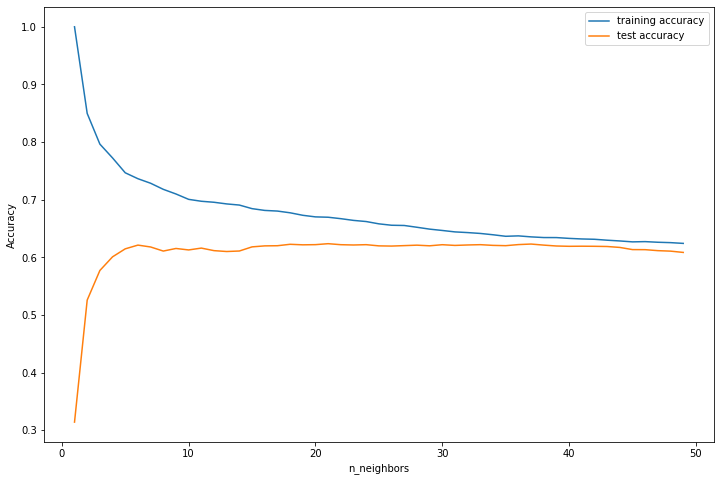

In [29]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 50)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_scaled_train_rev, y_train_rev)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_scaled_train_rev, y_train_rev))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_scaled_test_rev, y_test_rev))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [30]:
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 21


In [31]:
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_scaled_train_rev, y_train_rev)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_scaled_test_rev)



# SCORING the results
print('Training Score:', knn_opt.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  knn_opt.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_scaled_train_rev, y_train_rev).round(4)
knn_opt_score_test  = knn_opt.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6696
Testing Score: 0.6237


#### 7. RandomForest Regression

In [32]:
random_forest = RandomForestRegressor(n_estimators=200)

# FITTING the training data
rf_fit = random_forest.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
rf_pred = rf_fit.predict(X_scaled_test_rev)

print('Training Score:', random_forest.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  random_forest.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
random_forest_train_score = random_forest.score(X_scaled_train_rev, y_train_rev).round(4)
random_forest_test_score  = random_forest.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.9704
Testing Score: 0.8037


#### 8. Gradient Boosting Regression

In [47]:
gb = GradientBoostingRegressor(learning_rate=0.3, n_estimators=8)

# FITTING the training data
gb_fit = gb.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
gb_pred = gb_fit.predict(X_scaled_test_rev)

print('Training Score:', gb.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  gb.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
gb_train_score = gb.score(X_scaled_train_rev, y_train_rev).round(4)
gb_test_score  = gb.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.7912
Testing Score: 0.8057


#### 9. AdaBoostRegressor

In [34]:
ab = AdaBoostRegressor()

# FITTING the training data
ab_fit = ab.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
ab_pred = ab_fit.predict(X_scaled_test_rev)

print('Training Score:', ab.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  ab.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
ab_train_score = ab.score(X_scaled_train_rev, y_train_rev).round(4)
ab_test_score  = ab.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6976
Testing Score: 0.6033


#### 10. DecisionTreeRegressor

In [35]:
dt = DecisionTreeRegressor(max_depth=4)

# FITTING the training data
dt_fit = dt.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
dt_pred = dt_fit.predict(X_scaled_test_rev)

print('Training Score:', dt.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  dt.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
dt_train_score = dt.score(X_scaled_train_rev, y_train_rev).round(4)
dt_test_score  = dt.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.7177
Testing Score: 0.669


#### 11. BaggingRegressor

In [46]:
bg = BaggingRegressor(max_samples=1.0, max_features=1.0)

# FITTING the training data
bg_fit = bg.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
bg_pred = bg_fit.predict(X_scaled_test_rev)

print('Training Score:', bg.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  bg.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
bg_train_score = bg.score(X_scaled_train_rev, y_train_rev).round(4)
bg_test_score  = bg.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.9508
Testing Score: 0.8268


#### 12. MLP Regressor

In [37]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 40, 30), max_iter=50000, learning_rate='adaptive', activation='relu', 
                   early_stopping=False, alpha=0.5)

# FITTING the training data
mlp_fit = mlp.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
mlp_pred = mlp_fit.predict(X_scaled_test_rev)

print('Training Score:', mlp.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  mlp.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
mlp_train_score = mlp.score(X_scaled_train_rev, y_train_rev).round(4)
mlp_test_score  = mlp.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.7449
Testing Score: 0.6468


#### 13. Elastic Net

In [38]:
en = sklearn.linear_model.ElasticNet(alpha=0.0001, normalize=True)
# FITTING the training data
en_fit = en.fit(X_scaled_train_rev, y_train_rev)


# PREDICTING on new data
en_pred = en_fit.predict(X_scaled_test_rev)

print('Training Score:', en.score(X_scaled_train_rev, y_train_rev).round(4))
print('Testing Score:',  en.score(X_scaled_test_rev, y_test_rev).round(4))


# saving scoring data for future use
en_train_score = en.score(X_scaled_train_rev, y_train_rev).round(4)
en_test_score  = en.score(X_scaled_test_rev, y_test_rev).round(4)

Training Score: 0.6484
Testing Score: 0.6021
